<a href="https://colab.research.google.com/github/shiivaniiiii/sweeet__recognition/blob/main/model_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#connect to drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Loading Model

In [3]:
cnn = tf.keras.models.load_model("/content/trained_model.h5")

Visualization And Performing Prediction On Single Image

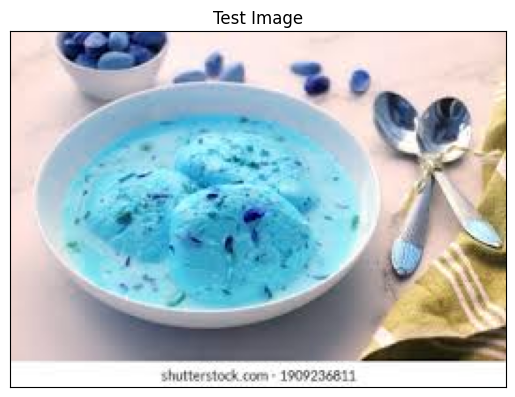

In [4]:
import cv2
image_path = "/content/drive/MyDrive/sweet_recognition/test/rasmalai/img_13.jpeg"
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

# Testing Model

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size = (64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #converting single image to batch
predictions = cnn.predict(input_arr)

1/1 [==============================] - 1s 500ms/step


In [6]:
print(predictions[0])
print(max(predictions[0]))

[2.0396025e-09 1.8697321e-09 1.1531731e-06 2.7837442e-07 8.0539416e-14
 2.9642585e-14 8.7878579e-11 3.5366190e-14 9.9999857e-01 1.2182862e-08]
0.99999857


In [7]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/sweet_recognition/test',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode= 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset =None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 200 files belonging to 10 classes.


In [8]:
test_set.class_names

['balusahi',
 'doda_barfi',
 'ghewar',
 'gulab_jamun',
 'jalebi',
 'kaju_katli',
 'motichur',
 'rasgulla',
 'rasmalai',
 'soan_papdi']

In [9]:
result_index = np.where(predictions[0] == max(predictions[0]))
print(result_index)

(array([8]),)


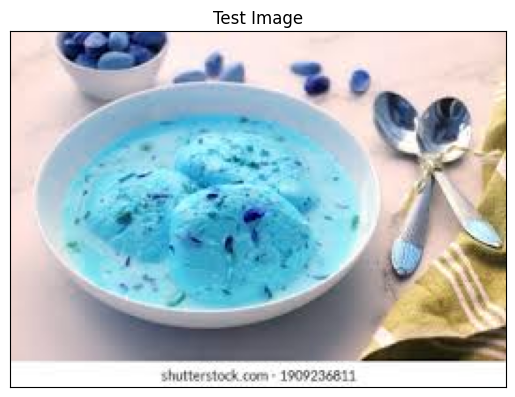

In [10]:
# Display Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
# Single Prediction
print("It is a {}" .format(test_set.class_names[result_index[0][0]]))

It is a rasmalai
